# Random Forest (Survived Titanic Predicition)

## A.Import library

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A.1 read data

In [46]:
try:
 df = pd.read_csv("titanic_train.csv")
 print("Berhasil membaca data")
except Exception as e:
 print(f"Gagal membaca data as {e}")

Berhasil membaca data


### A.2 Melihat 5 data teratas dan 5 data terbawah

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### A.3 Melihat Informasi data

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### A.4 melihat dimensi data

In [50]:
df.shape

(891, 12)

### A.5 Cek duplikasi data

In [51]:
df.duplicated().sum()

np.int64(0)

### A.6 Cek nilai kosong

In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### A.7 cek statistik Data

In [53]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


### A.8 cek statistik Data

<Figure size 1000x800 with 0 Axes>

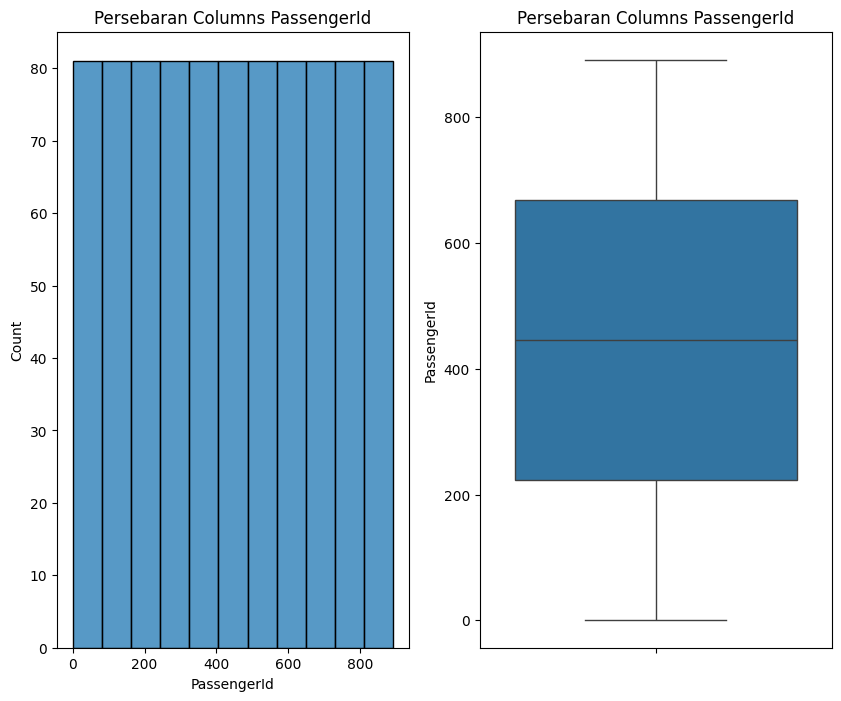

<Figure size 1000x800 with 0 Axes>

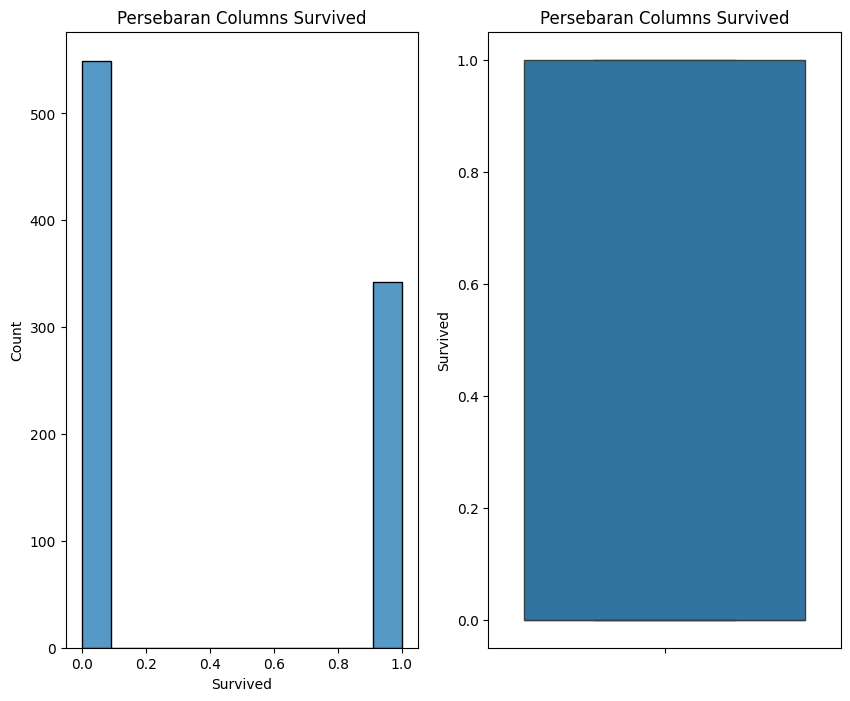

<Figure size 1000x800 with 0 Axes>

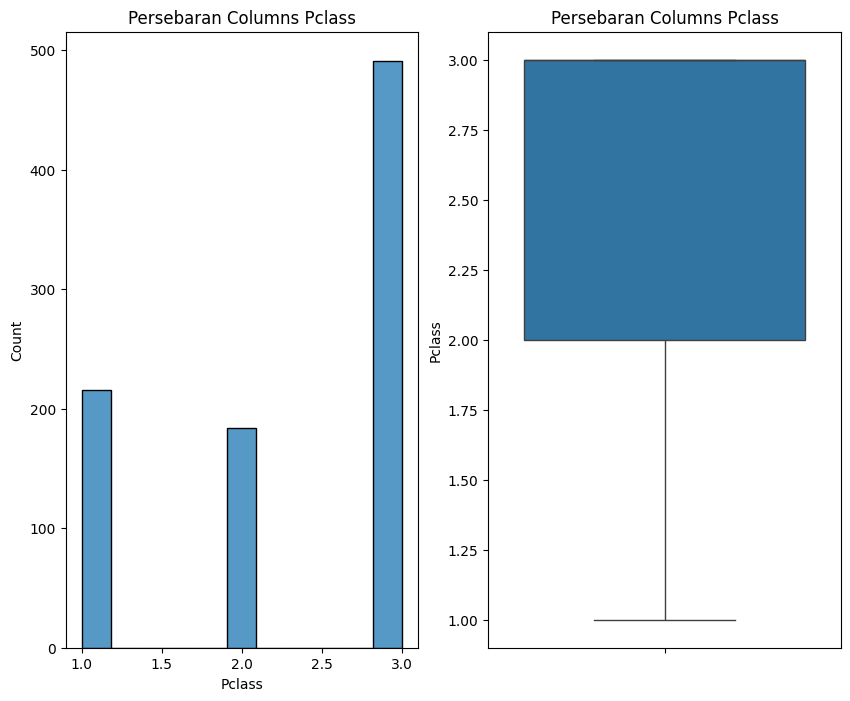

<Figure size 1000x800 with 0 Axes>

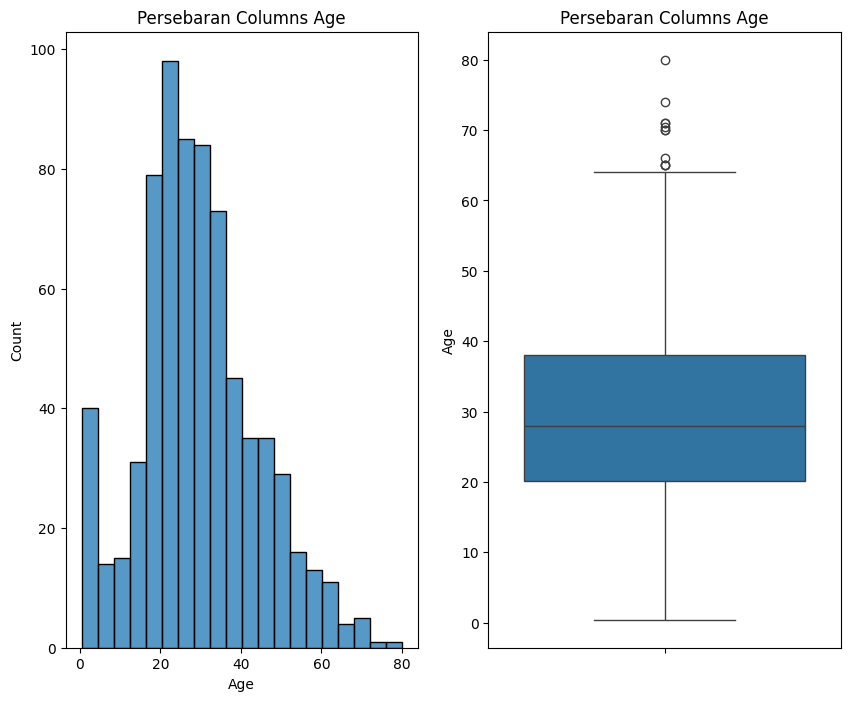

<Figure size 1000x800 with 0 Axes>

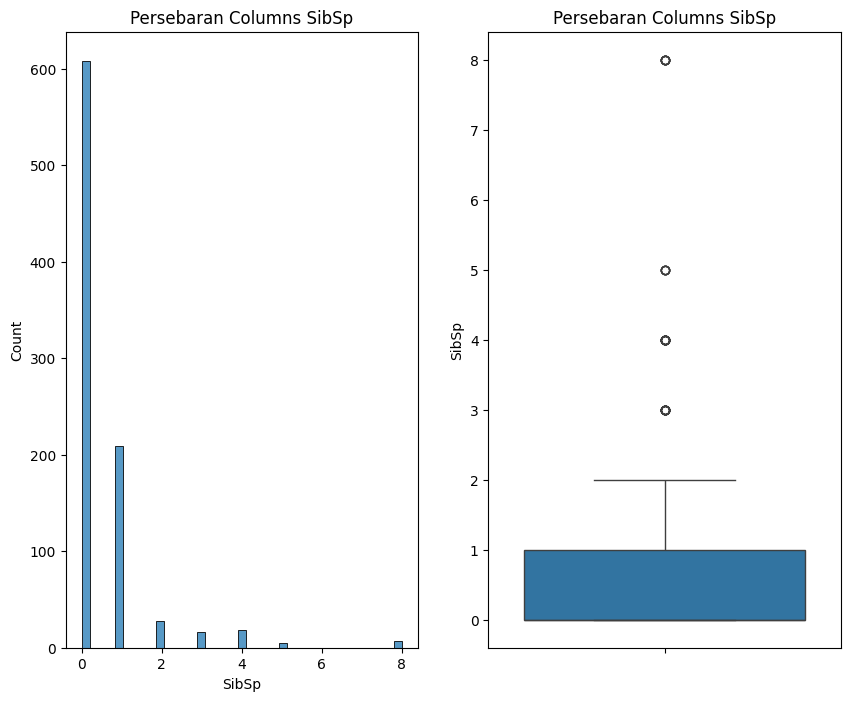

<Figure size 1000x800 with 0 Axes>

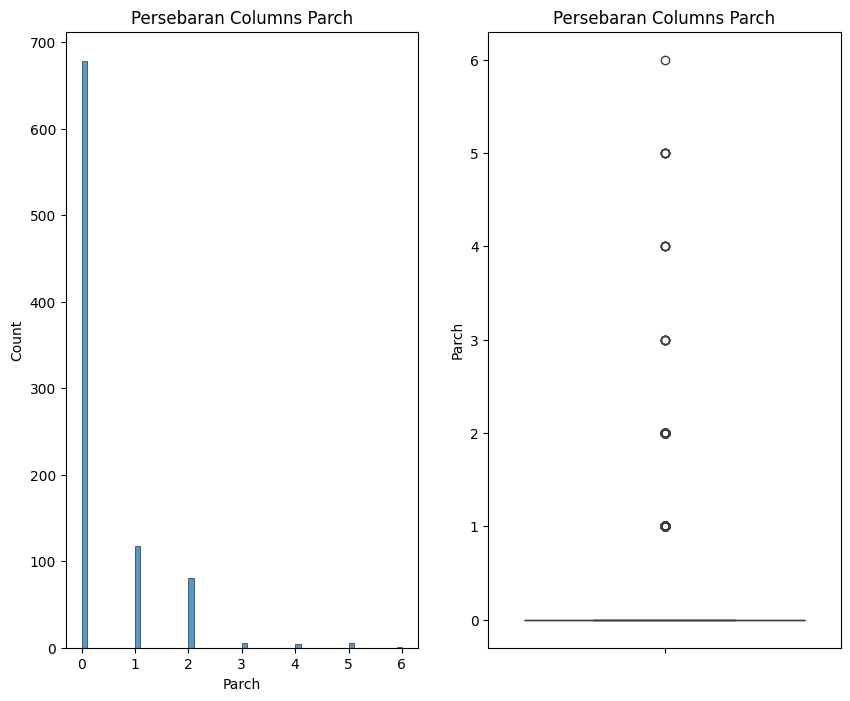

<Figure size 1000x800 with 0 Axes>

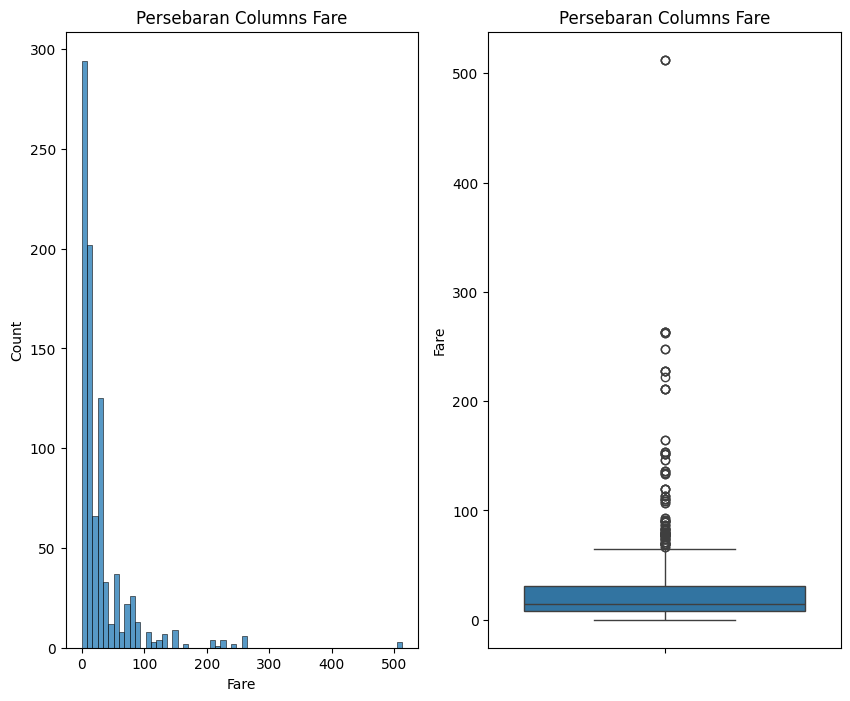

In [54]:
for col in df.select_dtypes(include='number'):
 plt.figure(figsize=(10, 8))
 fig, axes = plt.subplots(1, 2, figsize=(10, 8))
 sns.histplot(df[col], ax = axes[0])
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(df[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")


## B. Exploratory data analysis (EDA)

In [55]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [56]:
# 1. Ekstrak Gelar dari kolom 'Name'
# (Ambil teks setelah koma, sebelum titik, lalu bersihkan spasi)
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# 2. Hitung jumlahnya (Pandas punya fungsi sakti .value_counts)
hitung_gelar = df['Title'].value_counts()

C:\Users\ghatfan\AppData\Local\Temp\ipykernel_11988\2540342153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette='Set2')
C:\Users\ghatfan\AppData\Local\Temp\ipykernel_11988\2540342153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette='Set2')
C:\Users\ghatfan\AppData\Local\Temp\ipykernel_11988\2540342153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=col, palette='Set2')
C:\Users\ghatfan\AppData\Local\Temp\ipykernel_11988\2540342153.py:3: FutureWarning: 

Passing `palette` without ass

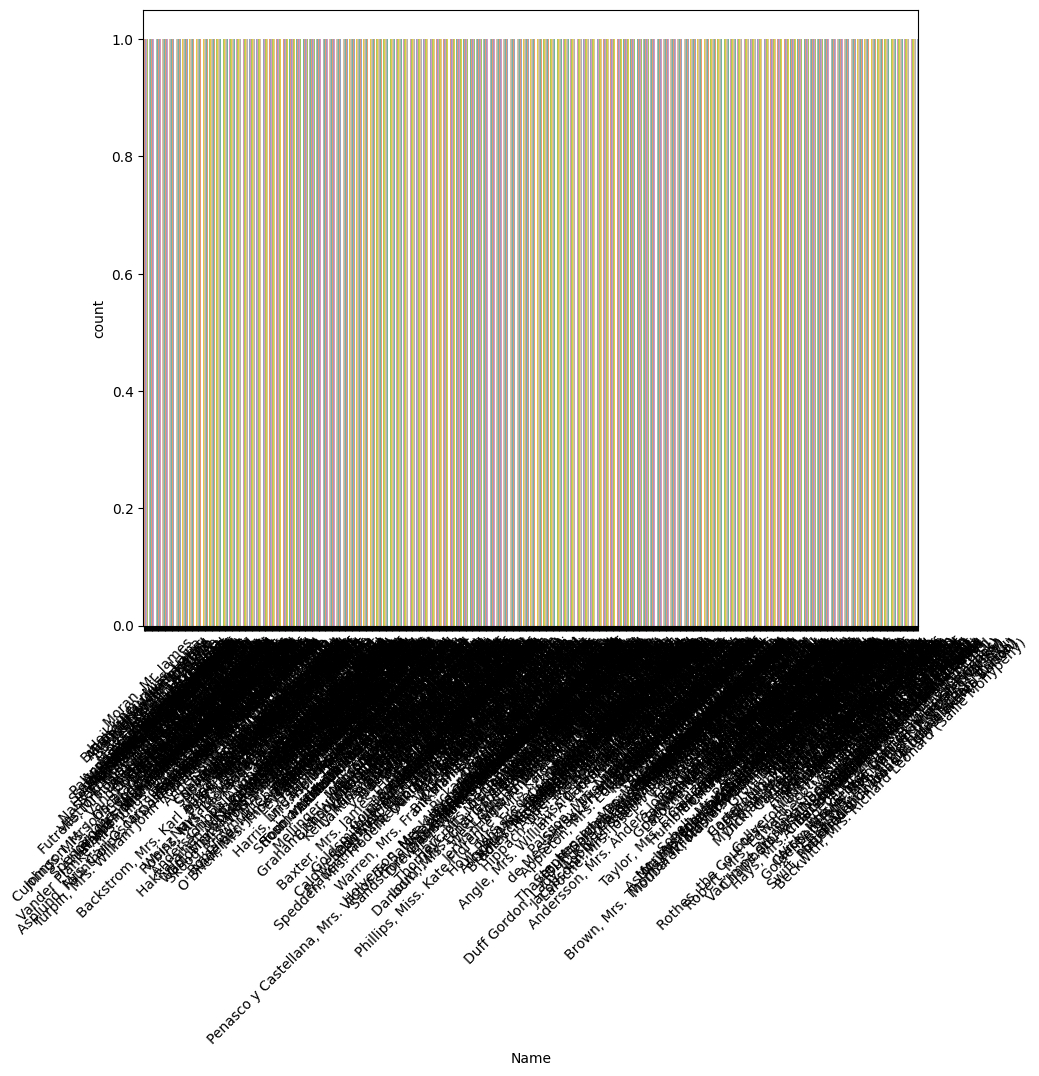

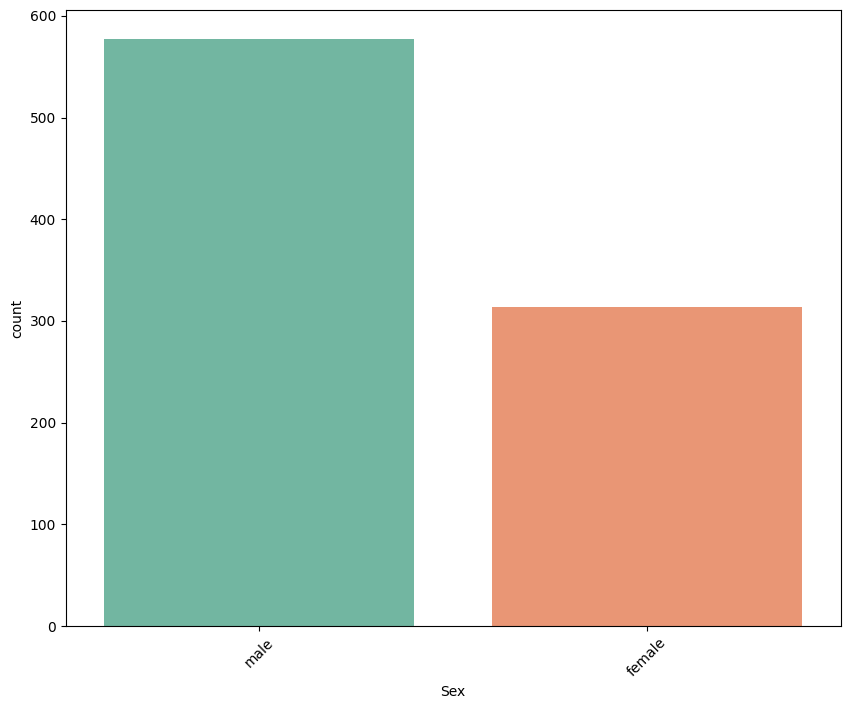

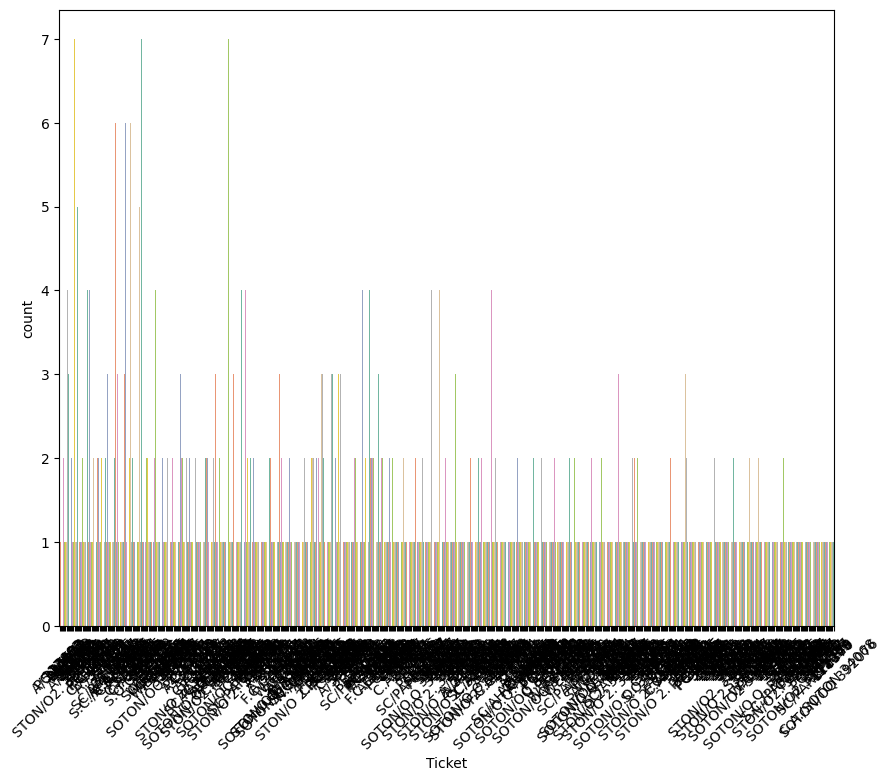

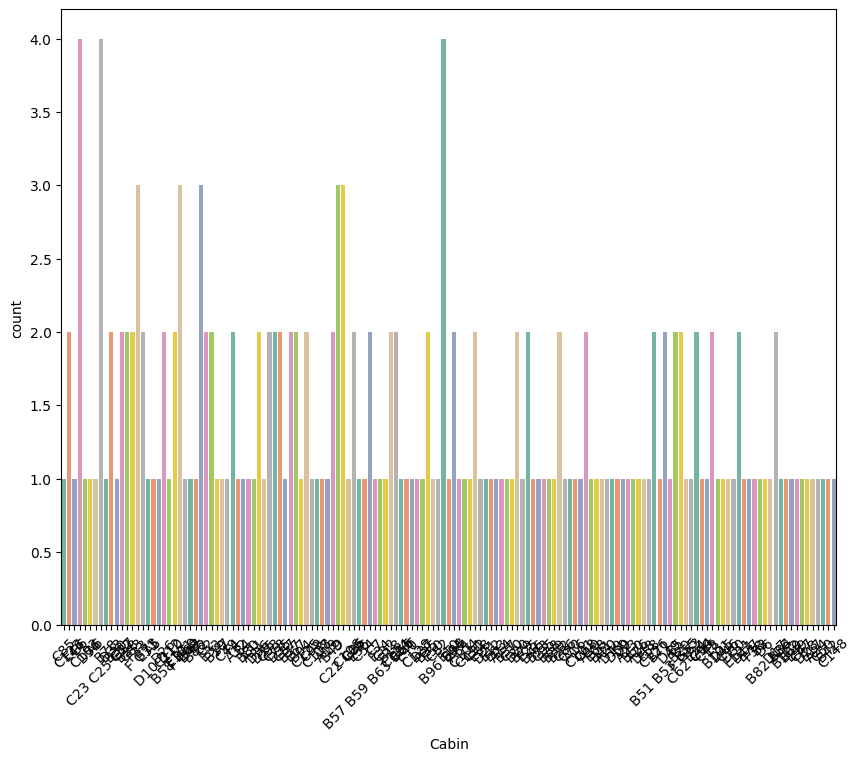

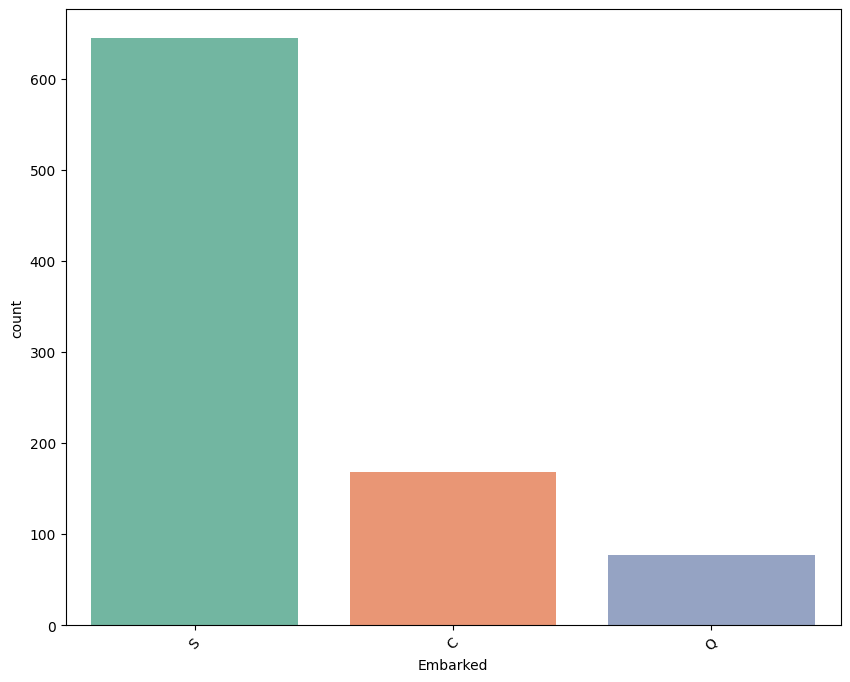

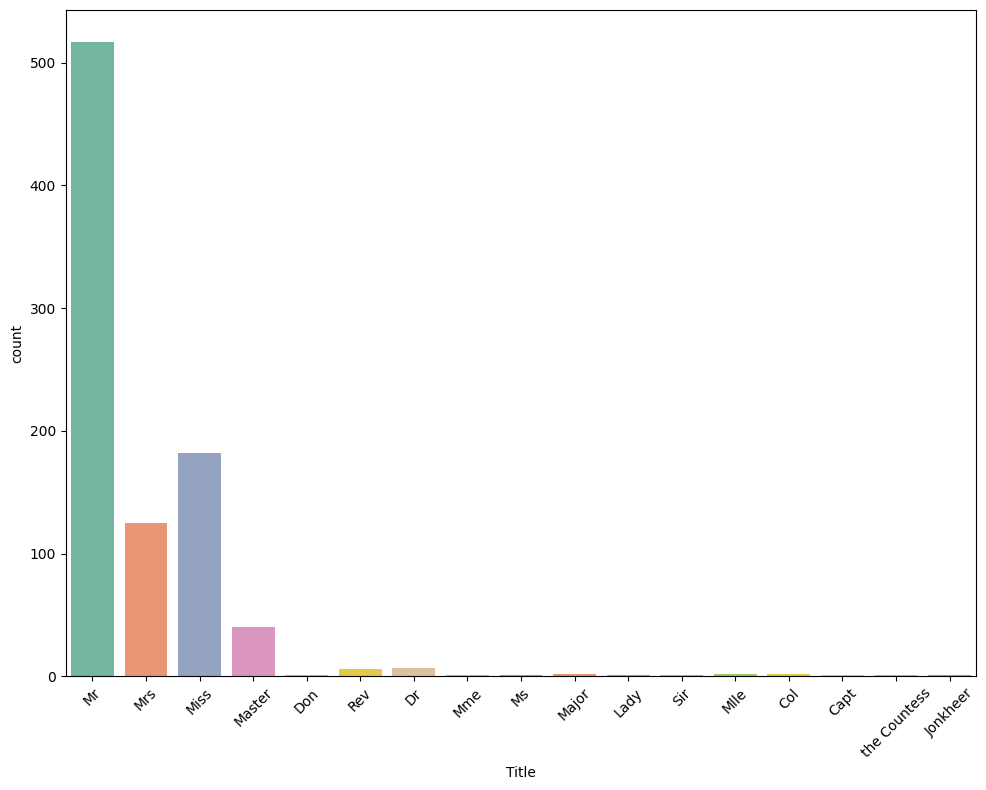

In [57]:
for col in df.select_dtypes(include='object'):
 plt.figure(figsize=(10, 8))
 sns.countplot(df, x=col, palette='Set2')
 plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

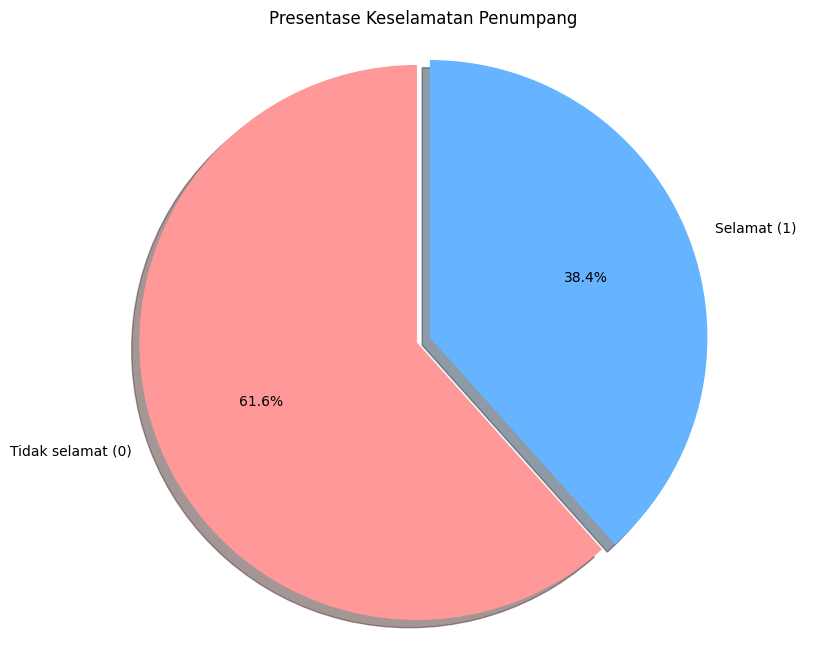

In [58]:
survived = df['Survived'].value_counts()

label = ['Tidak selamat (0)', 'Selamat (1)']

plt.figure(figsize=(10, 8))
plt.pie(survived,
        labels=label,
        autopct = '%1.1f%%', # fungsi untuk menampilkan persen
        startangle=90, # memutar posisi awal 90 derajat
        colors=['#ff9999', '#66b3ff'], # mengatur warna merah muda dan biru
        explode=(0.05, 0), # efek potongan kue
        shadow= True) # mengatur bayangan biar seperti 3D

plt.title("Presentase Keselamatan Penumpang")
plt.axis('equal')  # memastikan bentuknya bundar sempuerna
plt.show()

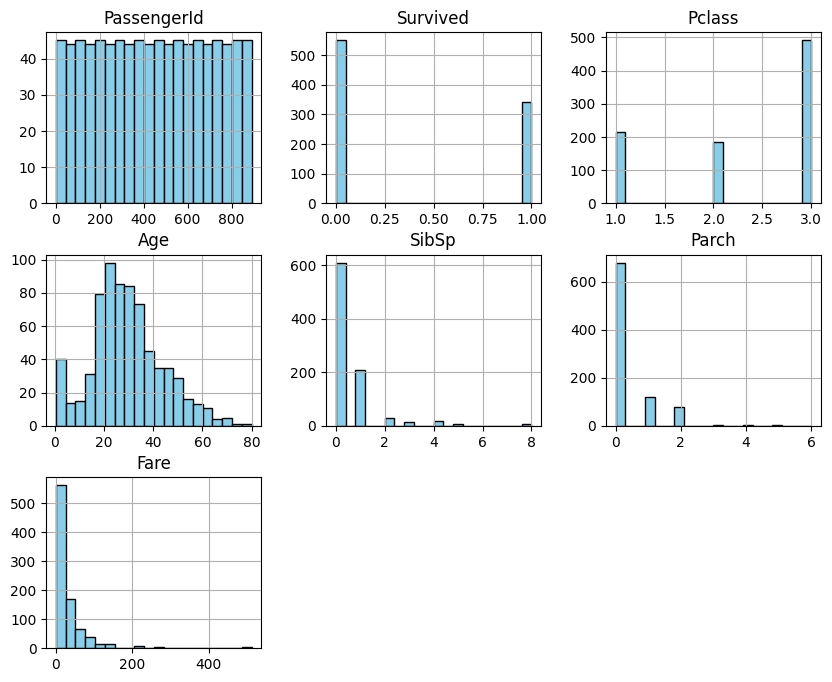

In [59]:
num = df.select_dtypes(include='number')

num.hist(bins = 20, edgecolor = 'black', color='skyblue', figsize=(10, 8))
plt.show()

In [60]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

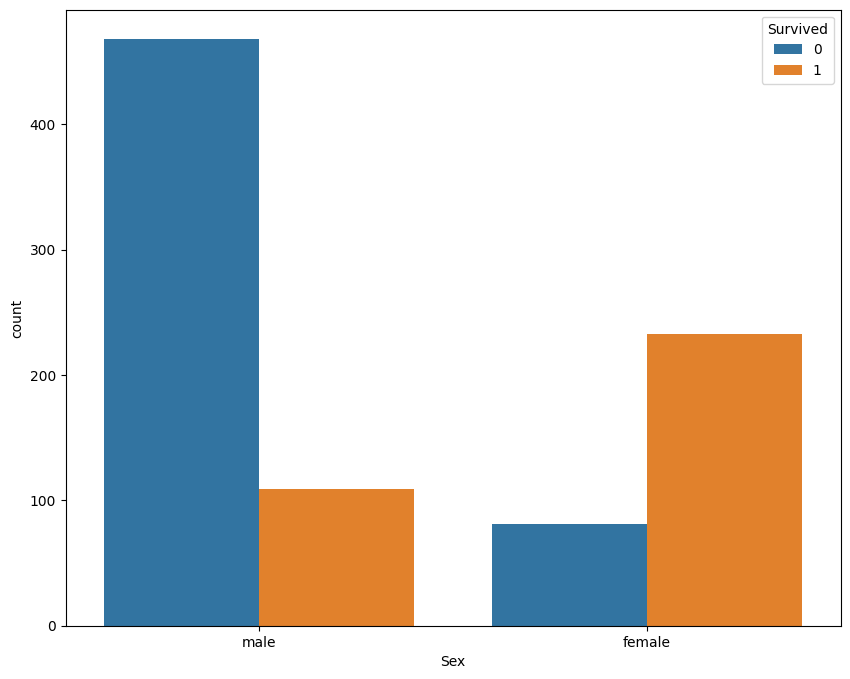

In [61]:
plt.figure(figsize=(10, 8))
sns.countplot(df,x ='Sex', hue='Survived')
plt.show()

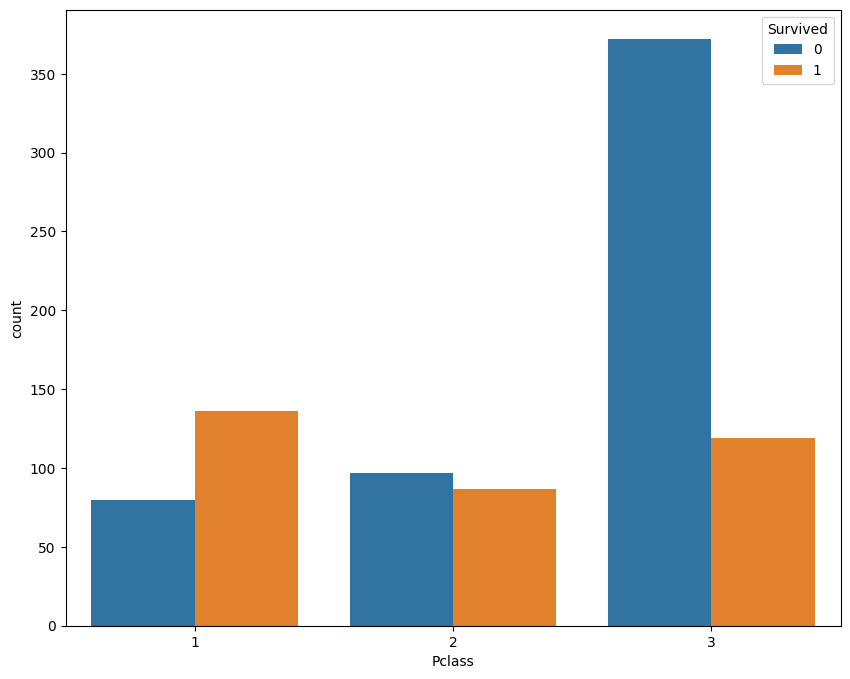

In [62]:
plt.figure(figsize=(10, 8))
sns.countplot(df,x ='Pclass', hue='Survived')
plt.show()

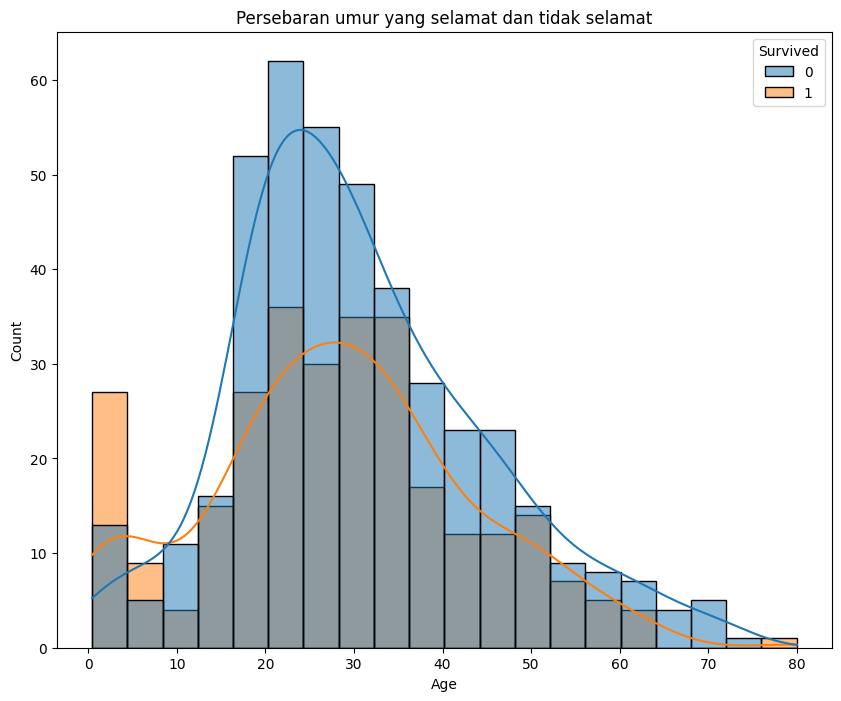

In [63]:
plt.figure(figsize=(10, 8))
sns.histplot(df,x ='Age', hue='Survived', kde=True)
plt.title("Persebaran umur yang selamat dan tidak selamat")
plt.show()

<Axes: >

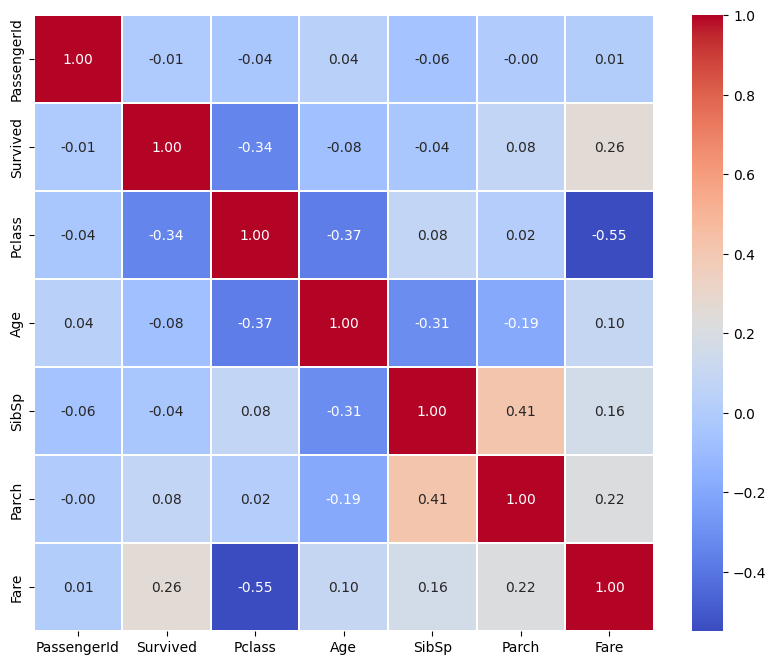

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap='coolwarm',
            fmt='.2f',
            linewidths=1.1)

## B. Data Preprocessing

### 1. Handling Outlier

In [65]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [66]:
df['SibSp'] = df['SibSp'].clip(1, 4)

### 2. Handling Missing Values

In [68]:
mode = df[['Embarked', 'Cabin']].mode().iloc[0]

In [69]:
mode

Embarked          S
Cabin       B96 B98
Name: 0, dtype: object

In [70]:
df[['Embarked', 'Cabin']] = df[['Embarked', 'Cabin']].fillna(mode)

In [72]:
mean = df['Age'].mean()

In [74]:
mean.round()

np.float64(30.0)

In [75]:
df['Age'] = df['Age'].fillna(mean)

In [79]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

### 3. Mapping gelar

In [77]:
# 2. Bikin Fungsi Penerjemah (Mapping)
def ubah_gelar_ke_angka(gelar):
    # Kelompokkan yang mirip-mirip (Sinonim)
    if gelar in ['Mlle', 'Ms']: 
        return 1 # Masukkan ke kategori 'Miss'
    elif gelar in ['Mme', 'Lady', 'Countess', 'Dona']:
        return 2 # Masukkan ke kategori 'Mrs'
    
    # Mapping Utama
    if gelar == 'Mr':
        return 0
    elif gelar == 'Miss':
        return 1
    elif gelar == 'Mrs':
        return 2
    elif gelar == 'Master':
        return 3
    else:
        return 4 # Kelompok 'Lainnya' (Dr, Rev, Col, dll)

# 3. Terapkan ke Kolom Title
df['Title'] = df['Title'].apply(ubah_gelar_ke_angka)

# 4. Cek hasilnya
print("Hasil Encoding Gelar:")
print(df['Title'].value_counts())

Hasil Encoding Gelar:
Title
0    517
1    185
2    127
3     40
4     22
Name: count, dtype: int64
